In [5]:
import matplotlib.pyplot as plt
import matplotlib
from importlib import reload
import numpy as np
import mxp_tools.labs.watt_balance

In [6]:
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})

[[ 0.32052632  0.287     ]
 [ 0.07809524  0.291     ]
 [-0.424       0.299     ]
 ...
 [-0.00619048 -0.0767    ]
 [-0.0065     -0.0645    ]
 [-0.00557895 -0.0629    ]] (3424, 2)
shift: 8


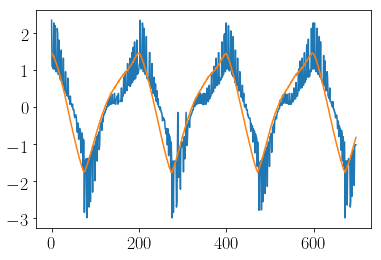

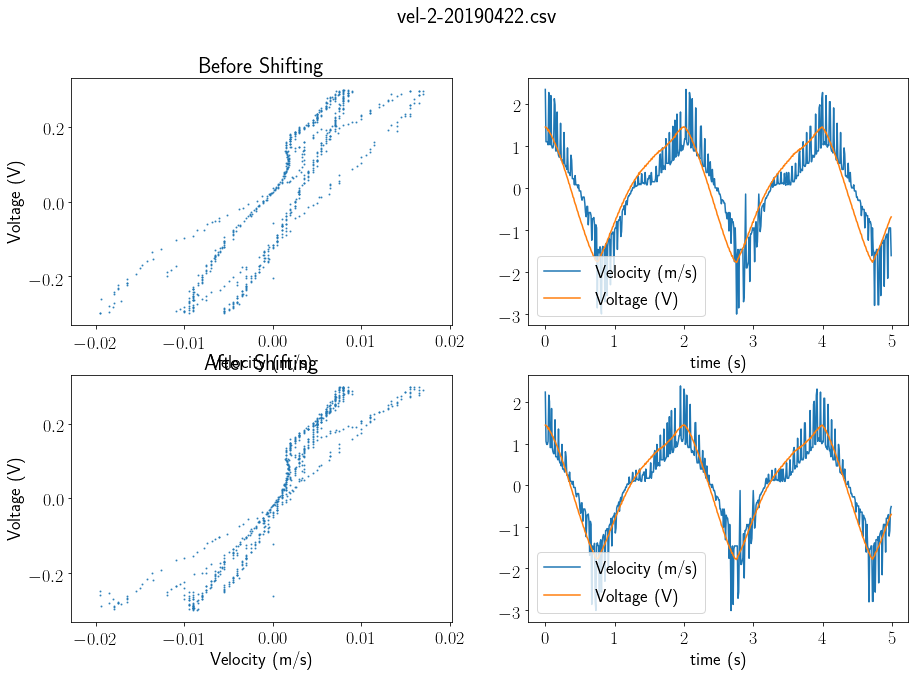

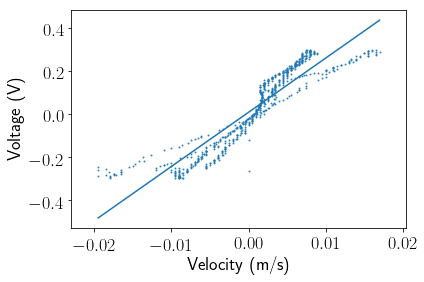

LinregressResult(slope=25.25322322273844, intercept=0.009124536203751619, rvalue=0.9243374864130864, pvalue=4.413468020152302e-290, stderr=0.39744133673803433)


In [7]:
reload(mxp_tools.labs.watt_balance)
VelocityMode = mxp_tools.labs.watt_balance.VelocityMode

V = VelocityMode('vel-2-20190422.csv', [1000,-1000])
V.process()
# display(V.data['shifted'].shape)
plt.show()

/home/michael/Documents/College/Phys_4052/jupyter/mxp-tools/mxp_tools/labs/watt_balance.py:65: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  position = data[0].as_matrix()
/home/michael/Documents/College/Phys_4052/jupyter/mxp-tools/mxp_tools/labs/watt_balance.py:66: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  voltage = data[2].as_matrix()
/home/michael/Documents/College/Phys_4052/jupyter/mxp-tools/mxp_tools/labs/watt_balance.py:85: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x_raw = raw_data[1].as_matrix()
/home/michael/Documents/College/Phys_4052/jupyter/mxp-tools/mxp_tools/labs/watt_balance.py:86: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_raw = raw_data[3].as_matrix()


[[-0.048       0.23      ]
 [ 0.069       0.218     ]
 [ 0.0235      0.208     ]
 ...
 [ 0.00285714 -0.0734    ]
 [ 0.0025     -0.0882    ]
 [ 0.00263158 -0.106     ]] (3027, 2)
shift: 12


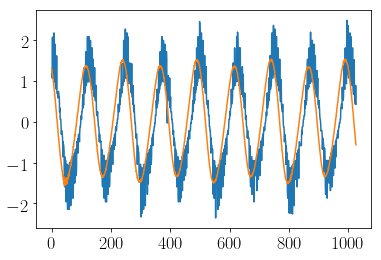

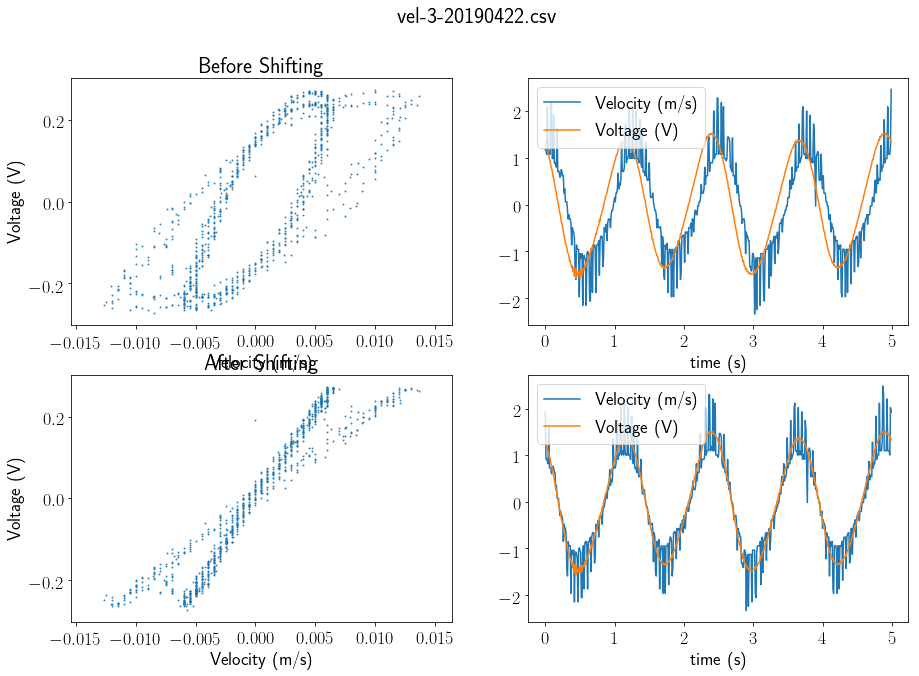

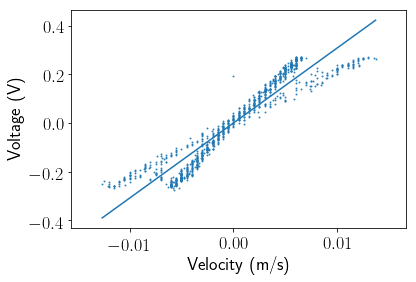

LinregressResult(slope=30.93195653732015, intercept=4.435811432035872e-05, rvalue=0.943067594768382, pvalue=0.0, stderr=0.3427548169574815)


In [8]:
reload(mxp_tools.labs.watt_balance)
VelocityMode = mxp_tools.labs.watt_balance.VelocityMode

V = VelocityMode('vel-3-20190422.csv')
V.process()
# display(V.data['shifted'].shape)
plt.show()

In [9]:
import pandas
df = pandas.DataFrame(V.data.stage2)

df.to_csv('xy-1.csv')

It looks like there are two modes in the data...

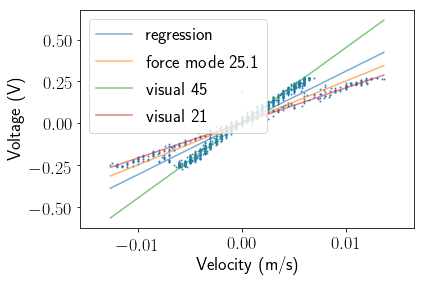

LinregressResult(slope=30.93195653732015, intercept=4.435811432035872e-05, rvalue=0.943067594768382, pvalue=0.0, stderr=0.3427548169574815)

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
xy = V.data.stage2
V.scatter(xy, ax)

result = V.data.slope
x = np.linspace(min(xy[:,0]), max(xy[:,0]), 100)
y = result.slope*x+result.intercept
ax.plot(x, y, label='regression', alpha=0.6)

y = 25.1021*x+result.intercept
ax.plot(x, y, label='force mode 25.1', alpha=0.6)

y = 45*x+result.intercept
ax.plot(x, y, label='visual 45', alpha=0.6)

y = 21*x+result.intercept
ax.plot(x, y, label='visual 21', alpha=0.6)
ax.legend()
plt.show()
display(V.data.slope)

The force mode measurement is shown in orange, and matches most closely with the weaker mode in the data. Will have to collect more data to confirm whether the more horizontal mode typically matches the data better.

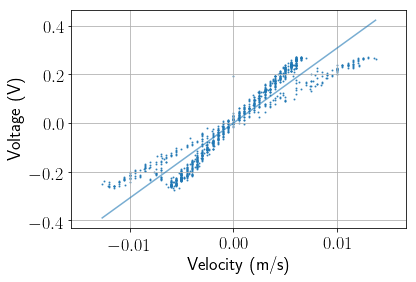

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
xy = V.data.stage2
V.scatter(xy, ax)

result = V.data.slope
x = np.linspace(min(xy[:,0]), max(xy[:,0]), 100)
y = result.slope*x+result.intercept
ax.plot(x, y, label='regression', alpha=0.6)

# y = 25.1021*x+result.intercept
# ax.plot(x, y, label='force mode 25.1', alpha=0.6)

# y = 45*x+result.intercept
# ax.plot(x, y, label='visual 45', alpha=0.6)

# y = 21*x+result.intercept
# ax.plot(x, y, label='visual 21', alpha=0.6)
# ax.legend()
ax.grid()
plt.show()

[[ 0.32052632  0.287     ]
 [ 0.07809524  0.291     ]
 [-0.424       0.299     ]
 ...
 [-0.00619048 -0.0767    ]
 [-0.0065     -0.0645    ]
 [-0.00557895 -0.0629    ]] (3424, 2)
shift: 8


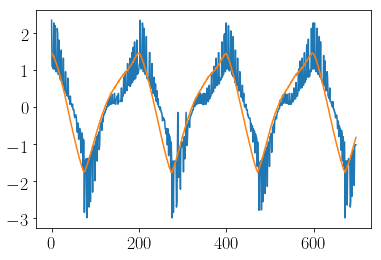

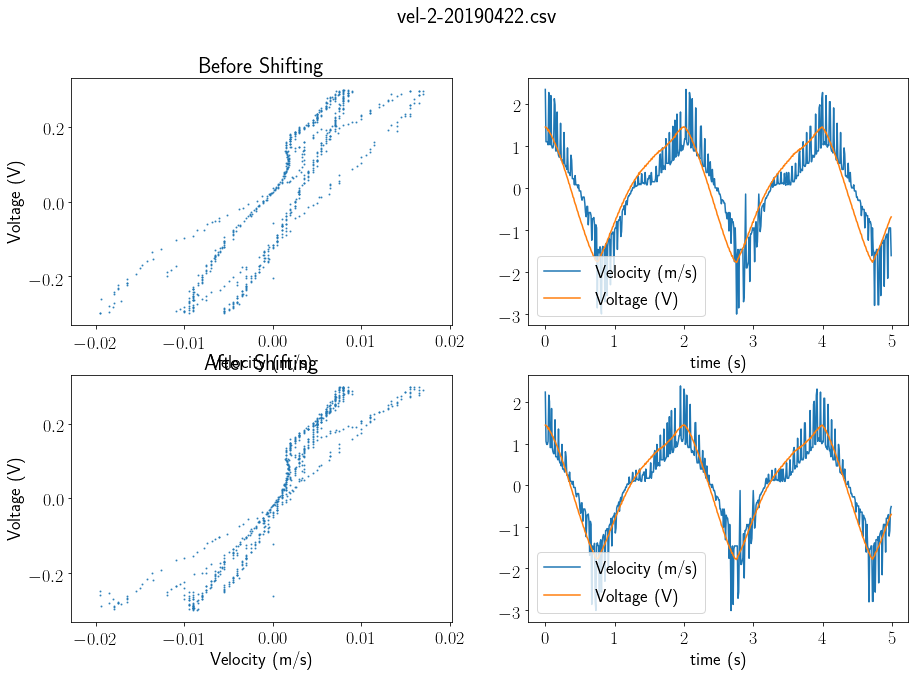

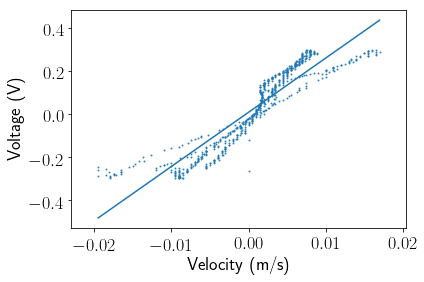

LinregressResult(slope=25.25322322273844, intercept=0.009124536203751619, rvalue=0.9243374864130864, pvalue=4.413468020152302e-290, stderr=0.39744133673803433)


In [12]:
reload(mxp_tools.labs.watt_balance)
VelocityMode = mxp_tools.labs.watt_balance.VelocityMode

V = VelocityMode('vel-2-20190422.csv')
V.process()
# display(V.data['shifted'].shape)
plt.show()

On the one hand this data matches the force mode measurement much better. On the other hand the linearity is not at all clear. There are still two clear modes, but the linear relationship is much less clear. I think we need to measure the velocity mode more cleanly, like in the previous example. 